## 步骤1：导入必要的库

In [1]:
# 数据处理
import pandas as pd
import numpy as np
from pymongo import MongoClient
from datetime import datetime

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置样式
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ 库导入成功！")

✅ 库导入成功！


## 步骤2：从MongoDB加载数据

In [25]:
# 连接MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['nyc_crime']
collection = db['complaints_2024']

# 加载数据到DataFrame
print("正在加载数据...")
data = list(collection.find())
df = pd.DataFrame(data)

# 数据预处理
df['cmplnt_fr_dt'] = pd.to_datetime(df['cmplnt_fr_dt'])
df['month'] = df['cmplnt_fr_dt'].dt.month
df['day_of_week'] = df['cmplnt_fr_dt'].dt.day_name()
df['hour'] = pd.to_datetime(df['cmplnt_fr_tm'], format='%H:%M:%S', errors='coerce').dt.hour

print(f"✅ 数据加载完成！")
print(f"   总记录数: {len(df):,}")
print(f"   日期范围: {df['cmplnt_fr_dt'].min()} 到 {df['cmplnt_fr_dt'].max()}")
print(f"\n数据预览:")
df.head()

正在加载数据...
✅ 数据加载完成！
   总记录数: 565,105
   日期范围: 2024-01-01 00:00:00 到 2024-12-31 00:00:00

数据预览:


,_id,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,boro_nm,latitude,longitude,ofns_desc,law_cat_cd,month,day_of_week,hour
0,6925dee319894db5592932a9,294083195,2024-01-01,08:00:00,STATEN ISLAND,40.622524,-74.163242,FRAUDS,MISDEMEANOR,1,Monday,8
1,6925dee319894db5592932aa,279782093,2024-01-01,13:25:00,STATEN ISLAND,40.527799,-74.232402,PETIT LARCENY,MISDEMEANOR,1,Monday,13
2,6925dee319894db5592932ab,286280058,2024-01-01,00:01:00,STATEN ISLAND,40.6447209438691,-74.0770327198983,RAPE,FELONY,1,Monday,0
3,6925dee319894db5592932ac,279805478,2024-01-01,00:30:00,BROOKLYN,40.596881,-73.996659,GRAND LARCENY,FELONY,1,Monday,0
4,6925dee319894db5592932ad,279794913,2024-01-01,17:45:00,BROOKLYN,40.645453,-74.02071,PETIT LARCENY,MISDEMEANOR,1,Monday,17


## 步骤3：数据概览

In [26]:
print("数据基本信息:")
print(f"行数: {df.shape[0]:,}")
print(f"列数: {df.shape[1]}")
print(f"\n各字段缺失值:")
print(df.isnull().sum())
print(f"\n数值型字段统计:")
df.describe()

数据基本信息:
行数: 565,105
列数: 12

各字段缺失值:


_id             0
cmplnt_num      0
cmplnt_fr_dt    0
cmplnt_fr_tm    0
boro_nm         0
latitude        0
longitude       0
ofns_desc       0
law_cat_cd      0
month           0
day_of_week     0
hour            0
dtype: int64

数值型字段统计:


,cmplnt_fr_dt,month,hour
count,565105,565105.000000,565105.000000
mean,2024-06-30 23:38:43.963864832,6.502563,13.322765
min,2024-01-01 00:00:00,1.000000,0.000000
25%,2024-04-04 00:00:00,4.000000,9.000000
50%,2024-07-02 00:00:00,7.000000,14.000000
75%,2024-09-27 00:00:00,9.000000,18.000000
max,2024-12-31 00:00:00,12.000000,23.000000
std,NaN,3.377503,6.425634


---
# 📊 15种可视化图表
---

## 图表1：各行政区犯罪数量柱状图

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1856419593.py:16: UserWarning:

Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1856419593.py:16: UserWarning:

Glyph 25919 (\N{CJK UNIFIED IDEOGRAPH-653F}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1856419593.py:16: UserWarning:

Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1856419593.py:16: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1856419593.py:16: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1856419593.py:16: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) mis

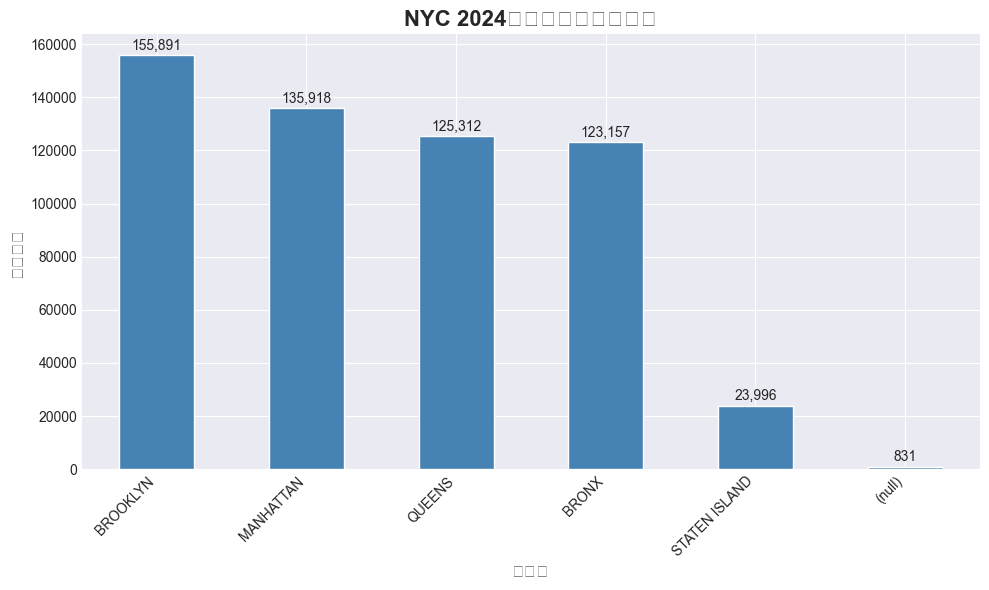


各行政区犯罪数量:
  BROOKLYN: 155,891
  MANHATTAN: 135,918
  QUEENS: 125,312
  BRONX: 123,157
  STATEN ISLAND: 23,996
  (null): 831


In [27]:
# 统计各行政区犯罪数量
boro_counts = df['boro_nm'].value_counts()

# 创建柱状图
fig, ax = plt.subplots(figsize=(10, 6))
boro_counts.plot(kind='bar', color='steelblue', ax=ax)
ax.set_title('NYC 2024年各行政区犯罪数量', fontsize=16, fontweight='bold')
ax.set_xlabel('行政区', fontsize=12)
ax.set_ylabel('犯罪数量', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 在柱子上添加数值标签
for i, v in enumerate(boro_counts.values):
    ax.text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n各行政区犯罪数量:")
for boro, count in boro_counts.items():
    print(f"  {boro}: {count:,}")

## 图表2：犯罪类型饼图（Top 10）

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/972192484.py:23: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/972192484.py:23: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/972192484.py:23: UserWarning:

Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/972192484.py:23: UserWarning:

Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/972192484.py:23: UserWarning:

Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/972192484.py:23: UserWarning:

Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing f

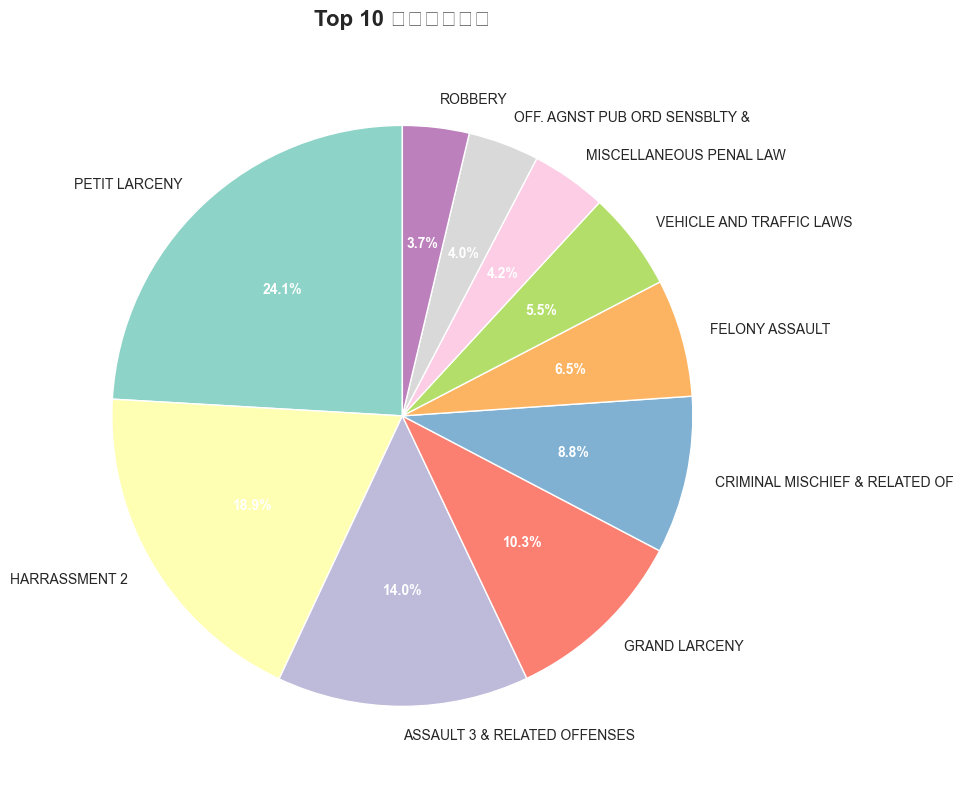

In [28]:
# 统计犯罪类型（Top 10）
crime_types = df['ofns_desc'].value_counts().head(10)

# 创建饼图
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Set3(range(len(crime_types)))
wedges, texts, autotexts = ax.pie(
    crime_types.values,
    labels=crime_types.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

# 美化标签
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('Top 10 犯罪类型分布', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 图表3：月度犯罪趋势折线图

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/953811817.py:19: UserWarning:

Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/953811817.py:19: UserWarning:

Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/953811817.py:19: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/953811817.py:19: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/953811817.py:19: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/953811817.py:19: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing f

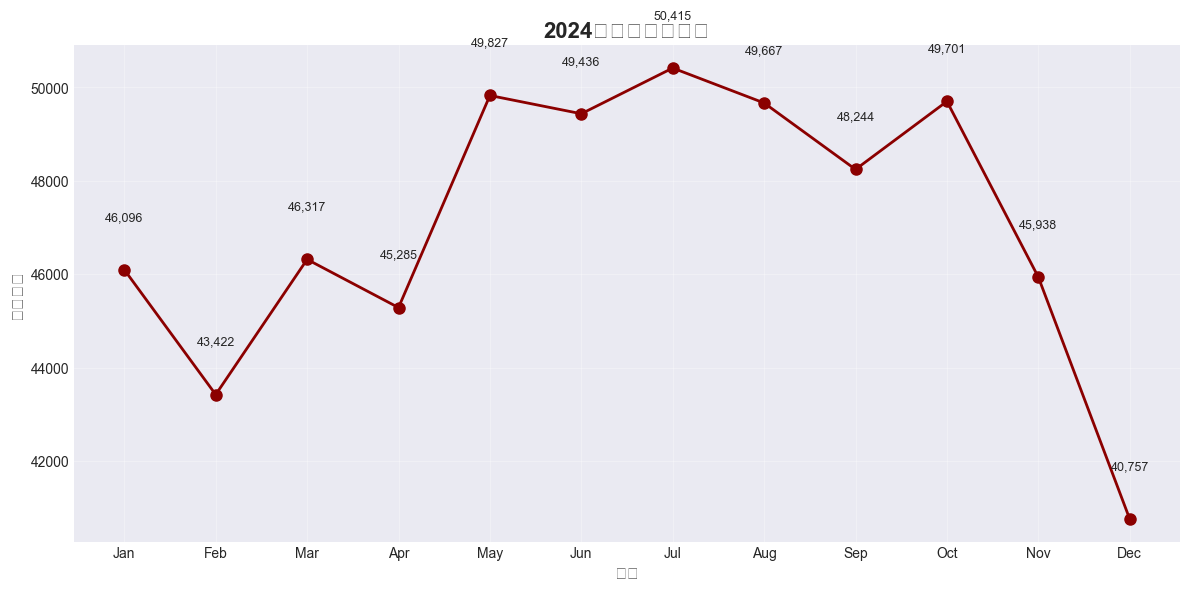

In [29]:
# 按月统计
monthly_crimes = df.groupby('month').size()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 创建折线图
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_crimes.index, monthly_crimes.values, marker='o', linewidth=2, markersize=8, color='darkred')
ax.set_title('2024年月度犯罪趋势', fontsize=16, fontweight='bold')
ax.set_xlabel('月份', fontsize=12)
ax.set_ylabel('犯罪数量', fontsize=12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.grid(True, alpha=0.3)

# 添加数值标签
for x, y in zip(monthly_crimes.index, monthly_crimes.values):
    ax.text(x, y + 1000, f'{y:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 图表4：星期分布条形图

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1914445765.py:16: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1914445765.py:16: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1914445765.py:16: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1914445765.py:16: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1914445765.py:16: UserWarning:

Glyph 26143 (\N{CJK UNIFIED IDEOGRAPH-661F}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1914445765.py:16: UserWarning:

Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) mis

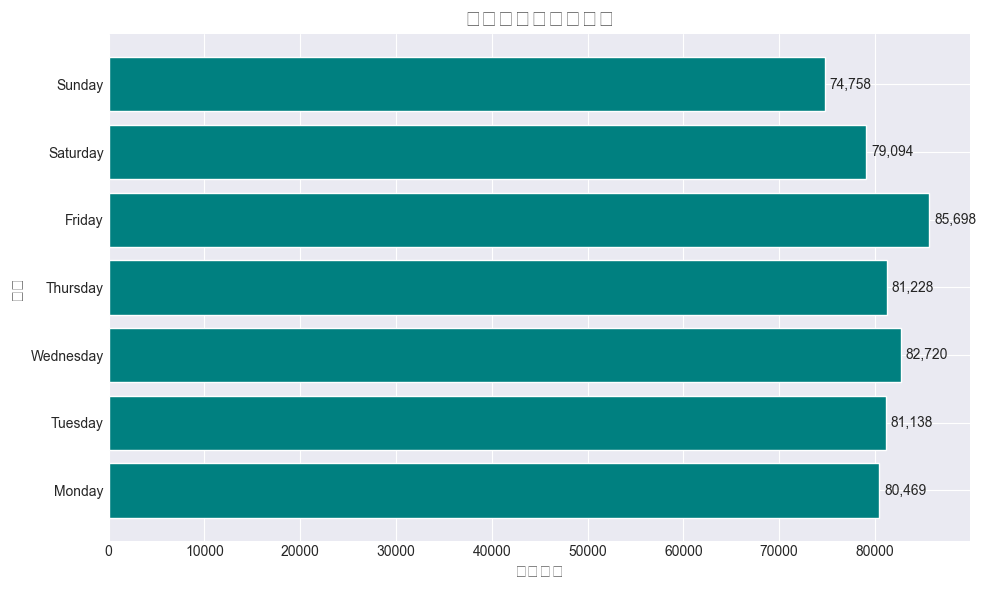

In [30]:
# 按星期统计
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)

# 创建条形图
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(day_counts.index, day_counts.values, color='teal')
ax.set_title('各星期犯罪数量分布', fontsize=16, fontweight='bold')
ax.set_xlabel('犯罪数量', fontsize=12)
ax.set_ylabel('星期', fontsize=12)

# 添加数值标签
for i, v in enumerate(day_counts.values):
    ax.text(v + 500, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 图表5：24小时犯罪分布直方图

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2773652773.py:13: UserWarning:

Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2773652773.py:13: UserWarning:

Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2773652773.py:13: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2773652773.py:13: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2773652773.py:13: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2773652773.py:13: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) mis

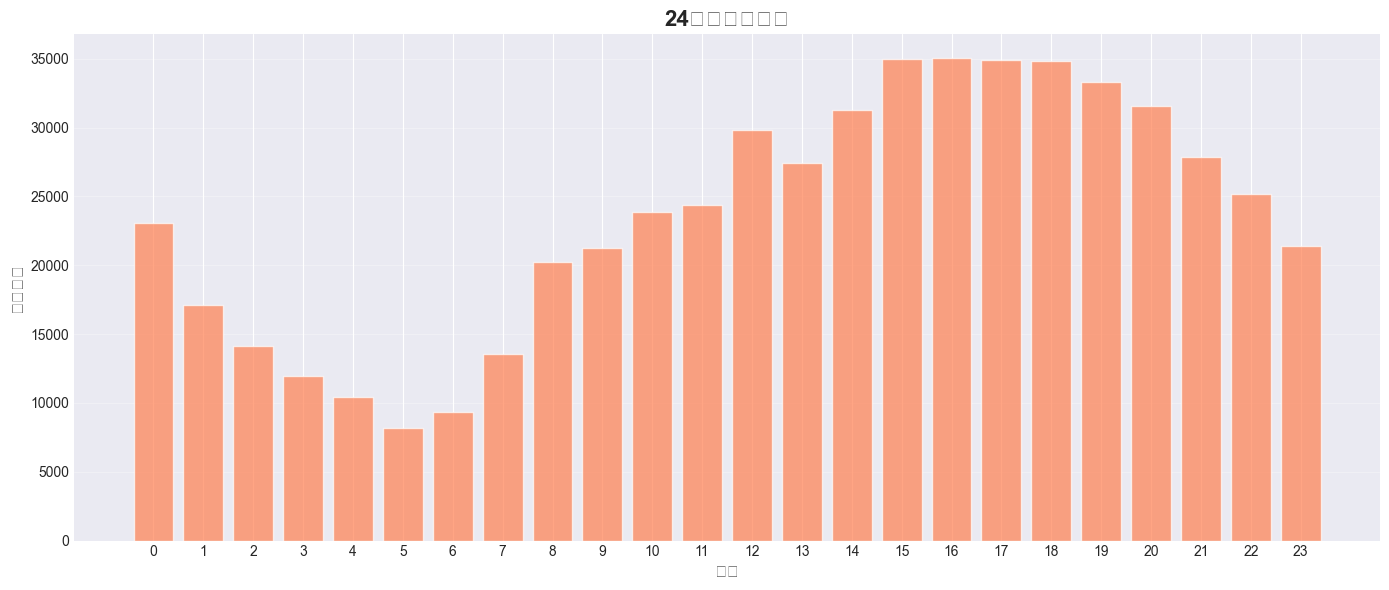

In [31]:
# 按小时统计
hourly_crimes = df['hour'].dropna().value_counts().sort_index()

# 创建直方图
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(hourly_crimes.index, hourly_crimes.values, color='coral', alpha=0.7)
ax.set_title('24小时犯罪分布', fontsize=16, fontweight='bold')
ax.set_xlabel('小时', fontsize=12)
ax.set_ylabel('犯罪数量', fontsize=12)
ax.set_xticks(range(0, 24))
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 图表6：法律类别分布（堆叠柱状图）

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/196645407.py:13: UserWarning:

Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/196645407.py:13: UserWarning:

Glyph 25919 (\N{CJK UNIFIED IDEOGRAPH-653F}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/196645407.py:13: UserWarning:

Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/196645407.py:13: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/196645407.py:13: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/196645407.py:13: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing f

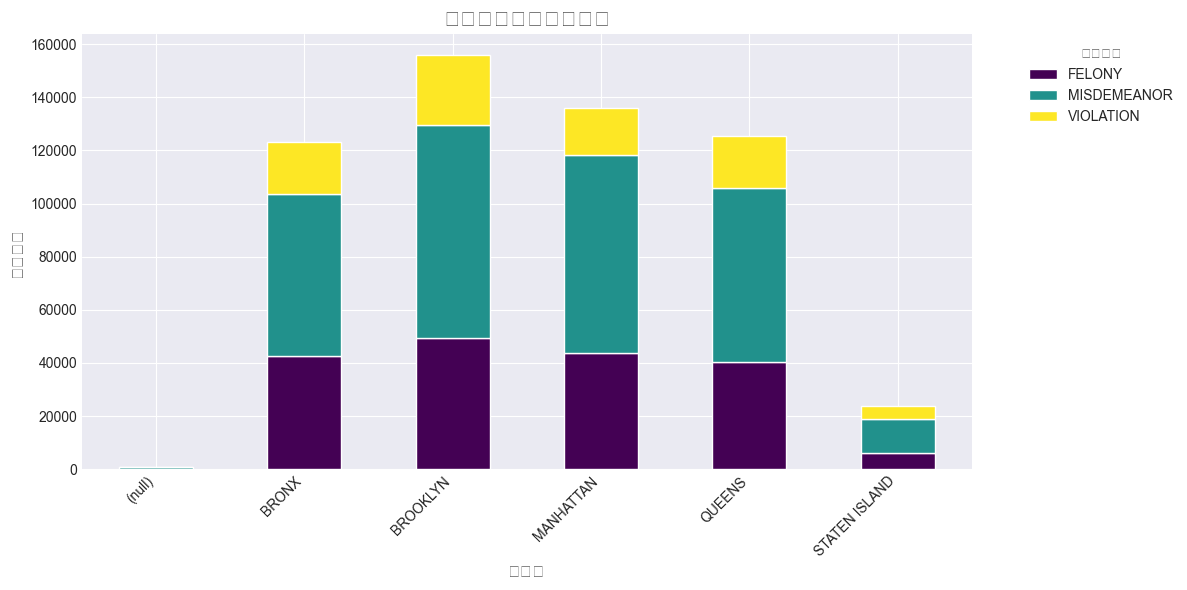

In [32]:
# 各行政区的法律类别分布
law_boro = pd.crosstab(df['boro_nm'], df['law_cat_cd'])

# 创建堆叠柱状图
fig, ax = plt.subplots(figsize=(12, 6))
law_boro.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('各行政区法律类别分布', fontsize=16, fontweight='bold')
ax.set_xlabel('行政区', fontsize=12)
ax.set_ylabel('犯罪数量', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='法律类别', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 图表7：热力图 - 行政区 vs 犯罪类型（Top 10）

/Users/ch4r1ty/nyc-crime-analysis/venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/Users/ch4r1ty/nyc-crime-analysis/venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/Users/ch4r1ty/nyc-crime-analysis/venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.

/Users/ch4r1ty/nyc-crime-analysis/venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2472950276.py:15: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2472950276.py:15: UserWarning:

Glyph 32618 (\N{CJK UNIF

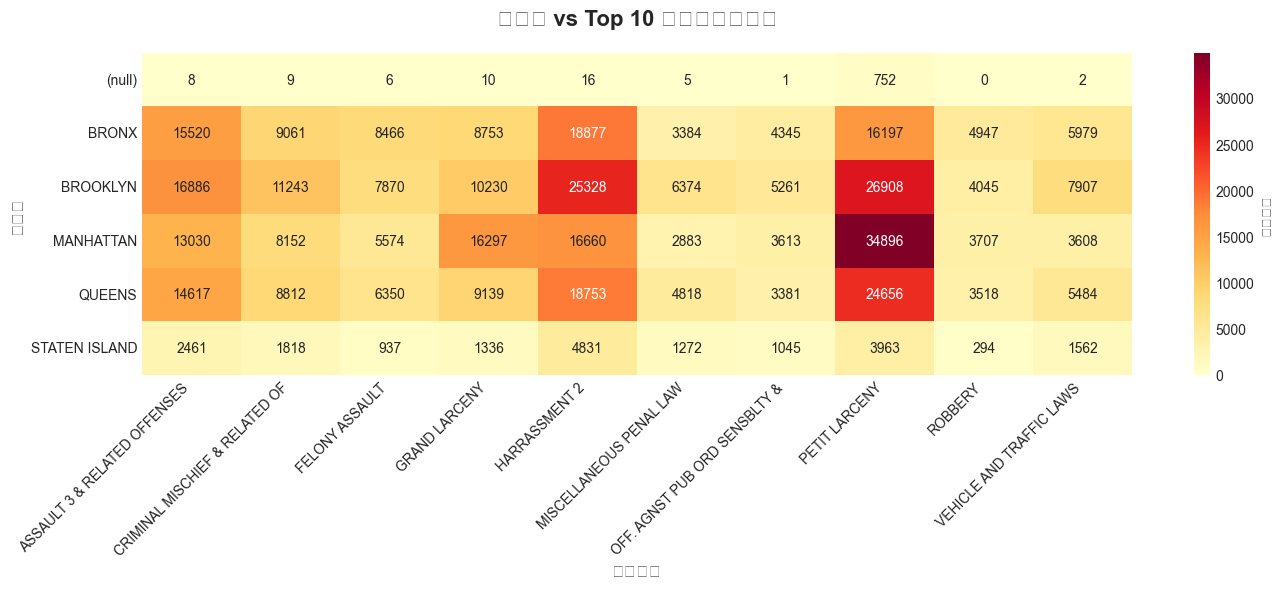

In [33]:
# 获取Top 10犯罪类型
top_crimes = df['ofns_desc'].value_counts().head(10).index
df_top = df[df['ofns_desc'].isin(top_crimes)]

# 创建交叉表
heatmap_data = pd.crosstab(df_top['boro_nm'], df_top['ofns_desc'])

# 创建热力图
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', ax=ax, cbar_kws={'label': '犯罪数量'})
ax.set_title('行政区 vs Top 10 犯罪类型热力图', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('犯罪类型', fontsize=12)
ax.set_ylabel('行政区', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 图表8：散点图 - 犯罪地理位置分布

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/340970610.py:20: UserWarning:

Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/340970610.py:20: UserWarning:

Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/340970610.py:20: UserWarning:

Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/340970610.py:20: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/340970610.py:20: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/340970610.py:20: UserWarning:

Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing f

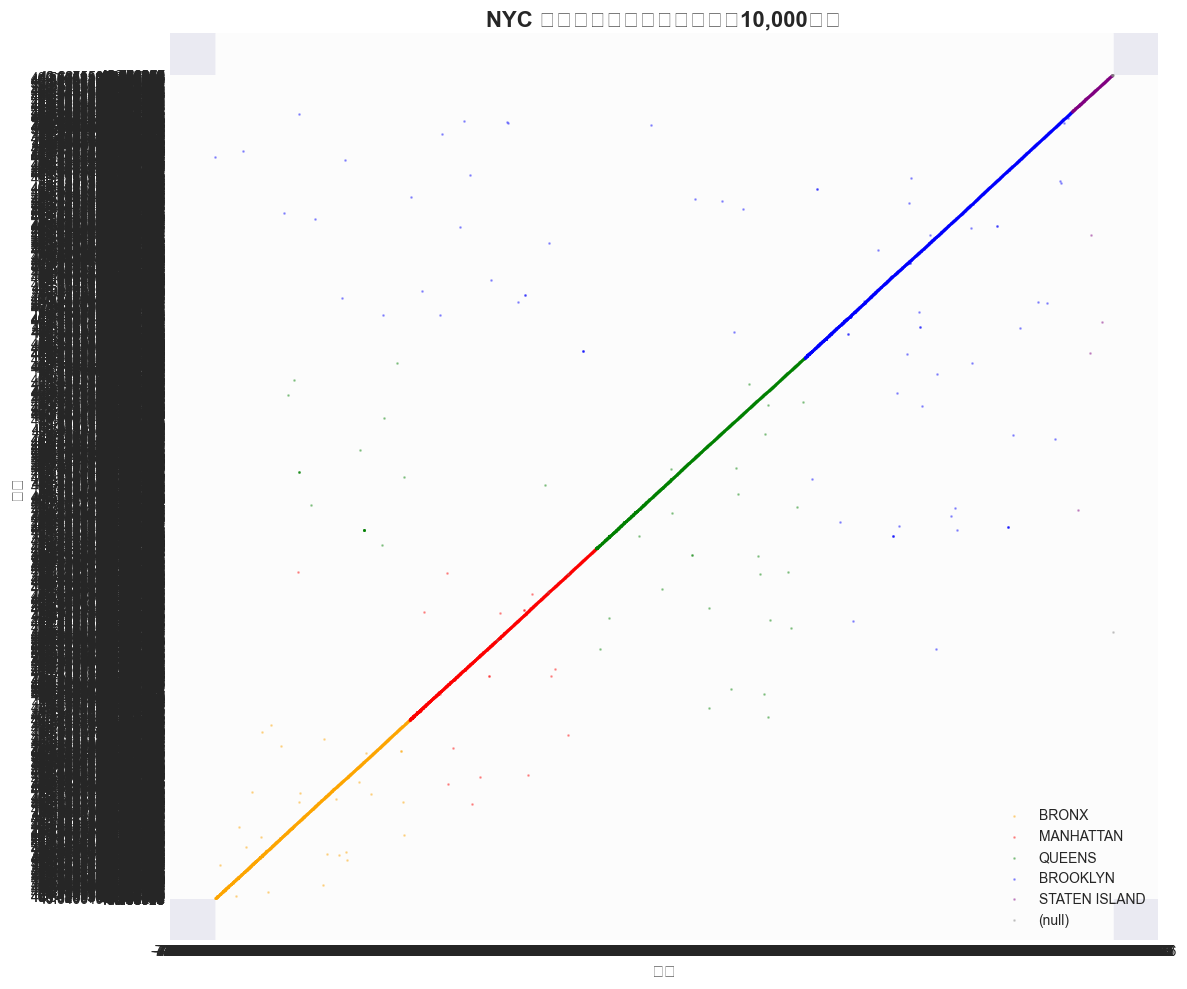

In [34]:
# 抽样（避免数据量过大）
df_sample = df.sample(n=min(10000, len(df)), random_state=42)

# 创建散点图
fig, ax = plt.subplots(figsize=(12, 10))
colors = {'MANHATTAN': 'red', 'BROOKLYN': 'blue', 'QUEENS': 'green', 
          'BRONX': 'orange', 'STATEN ISLAND': 'purple'}

for boro in df_sample['boro_nm'].unique():
    boro_data = df_sample[df_sample['boro_nm'] == boro]
    ax.scatter(boro_data['longitude'], boro_data['latitude'], 
               alpha=0.3, s=1, label=boro, c=colors.get(boro, 'gray'))

ax.set_title('NYC 犯罪地理位置分布（样本：10,000条）', fontsize=16, fontweight='bold')
ax.set_xlabel('经度', fontsize=12)
ax.set_ylabel('纬度', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 图表9：箱线图 - 各行政区小时分布

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1068944776.py:12: UserWarning:

Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1068944776.py:12: UserWarning:

Glyph 25919 (\N{CJK UNIFIED IDEOGRAPH-653F}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1068944776.py:12: UserWarning:

Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1068944776.py:12: UserWarning:

Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1068944776.py:12: UserWarning:

Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/1068944776.py:12: UserWarning:

Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) mis

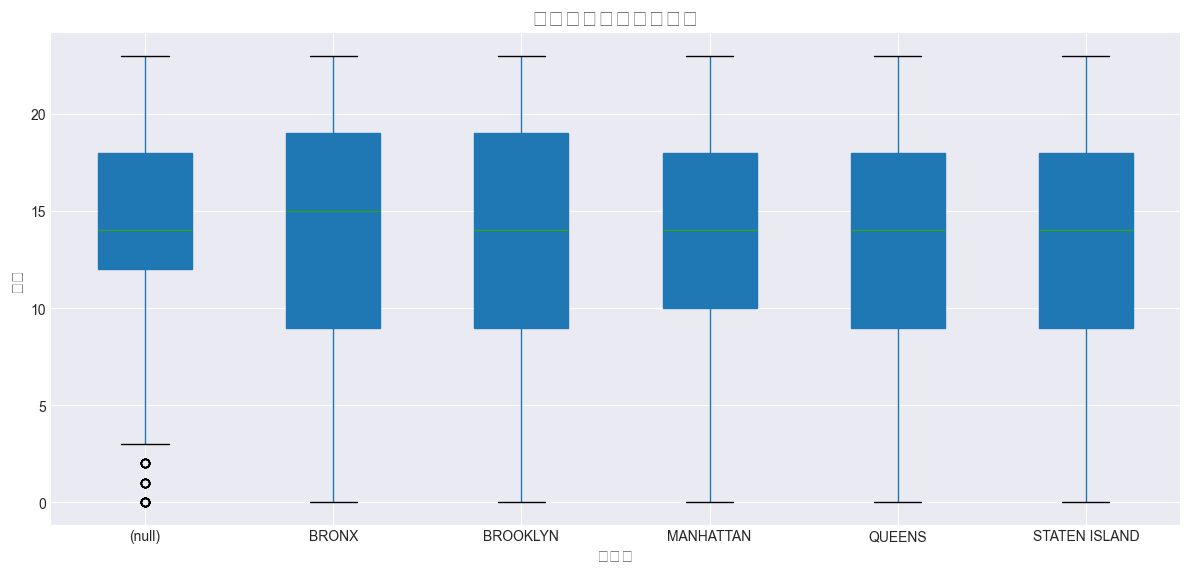

In [35]:
# 准备数据（去除空值）
df_hour = df[df['hour'].notna()]

# 创建箱线图
fig, ax = plt.subplots(figsize=(12, 6))
df_hour.boxplot(column='hour', by='boro_nm', ax=ax, patch_artist=True)
ax.set_title('各行政区犯罪时间分布', fontsize=16, fontweight='bold')
ax.set_xlabel('行政区', fontsize=12)
ax.set_ylabel('小时', fontsize=12)
plt.suptitle('')  # 移除默认标题

plt.tight_layout()
plt.show()

## 图表10：面积图 - 月度累积犯罪趋势

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/865490044.py:15: UserWarning:

Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/865490044.py:15: UserWarning:

Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/865490044.py:15: UserWarning:

Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/865490044.py:15: UserWarning:

Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/865490044.py:15: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/865490044.py:15: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing f

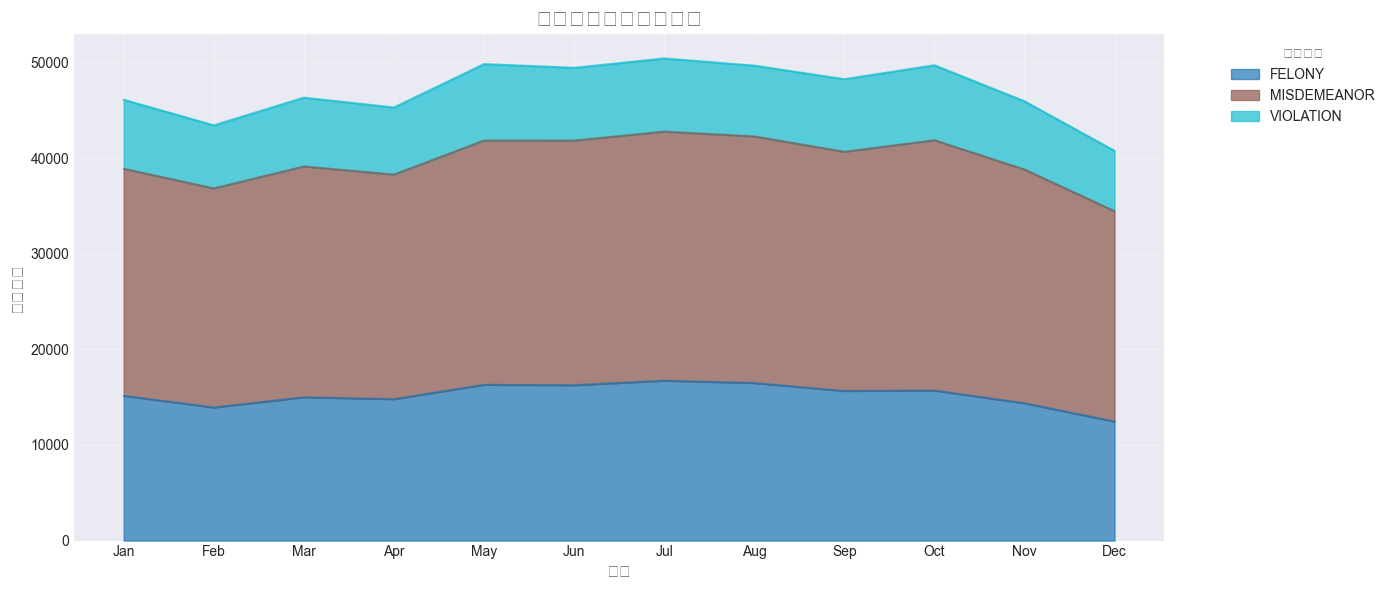

In [36]:
# 按月份和法律类别统计
monthly_law = df.groupby(['month', 'law_cat_cd']).size().unstack(fill_value=0)

# 创建面积图
fig, ax = plt.subplots(figsize=(14, 6))
monthly_law.plot(kind='area', stacked=True, alpha=0.7, ax=ax, colormap='tab10')
ax.set_title('月度法律类别累积趋势', fontsize=16, fontweight='bold')
ax.set_xlabel('月份', fontsize=12)
ax.set_ylabel('犯罪数量', fontsize=12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.legend(title='法律类别', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 图表11：小提琴图 - 各法律类别小时分布

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2916629294.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2916629294.py:10: UserWarning:

Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2916629294.py:10: UserWarning:

Glyph 24459 (\N{CJK UNIFIED IDEOGRAPH-5F8B}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2916629294.py:10: UserWarning:

Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/ipykernel_48336/2916629294.py:10: UserWarning:

Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) Arial.

/var/folders/j0/0cj0v_nd6yv501szbrmcf6qr0000gn/T/

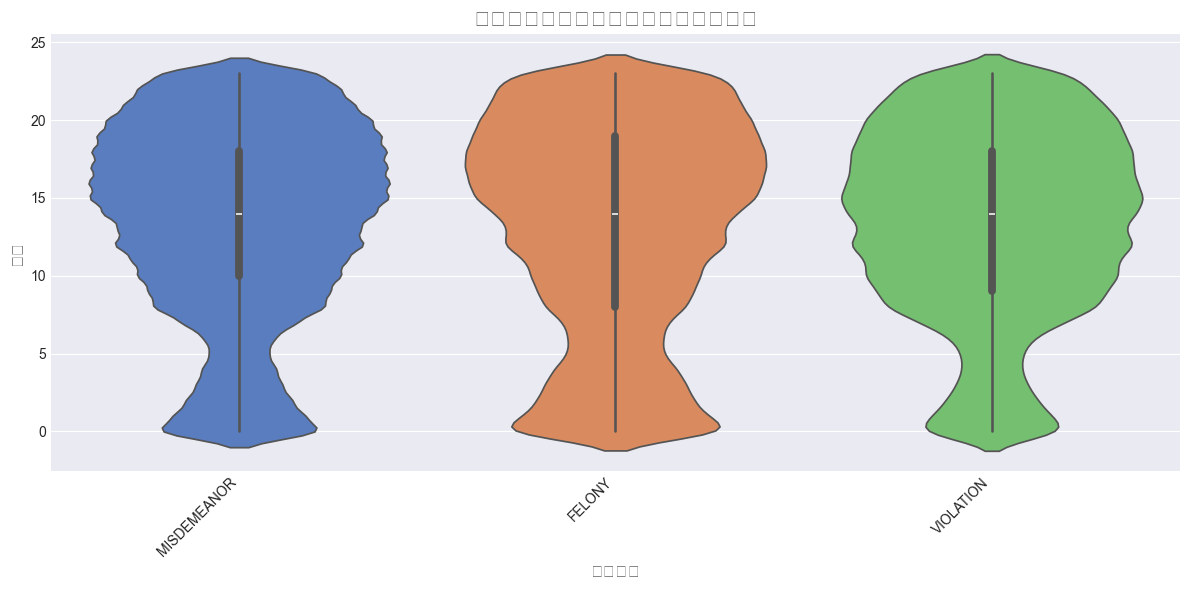

In [37]:
# 创建小提琴图
fig, ax = plt.subplots(figsize=(12, 6))
df_hour_law = df[df['hour'].notna()]
sns.violinplot(data=df_hour_law, x='law_cat_cd', y='hour', ax=ax, palette='muted')
ax.set_title('各法律类别犯罪时间分布（小提琴图）', fontsize=16, fontweight='bold')
ax.set_xlabel('法律类别', fontsize=12)
ax.set_ylabel('小时', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 图表12：交互式Plotly柱状图 - Top 15犯罪类型

In [38]:
# Top 15 犯罪类型
top15_crimes = df['ofns_desc'].value_counts().head(15)

# 创建交互式柱状图
fig = px.bar(
    x=top15_crimes.index,
    y=top15_crimes.values,
    title='Top 15 犯罪类型（交互式）',
    labels={'x': '犯罪类型', 'y': '数量'},
    color=top15_crimes.values,
    color_continuous_scale='viridis'
)
fig.update_layout(height=600, showlegend=False)
fig.update_xaxes(tickangle=45)
fig.show()

## 图表13：交互式Plotly饼图 - 行政区分布

In [39]:
# 行政区分布
boro_data = df['boro_nm'].value_counts()

# 创建交互式饼图
fig = px.pie(
    values=boro_data.values,
    names=boro_data.index,
    title='各行政区犯罪分布（交互式饼图）',
    hole=0.3  # 创建圆环图效果
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=600)
fig.show()

## 图表14：交互式地图 - 犯罪热点分布

In [40]:
# 清理地理坐标数据
df_clean = df.copy()
df_clean['latitude'] = pd.to_numeric(df_clean['latitude'], errors='coerce')
df_clean['longitude'] = pd.to_numeric(df_clean['longitude'], errors='coerce')

# 过滤出有效的NYC坐标范围
df_clean = df_clean[
    (df_clean['latitude'].between(40.4, 41.0)) & 
    (df_clean['longitude'].between(-74.3, -73.7))
]

print(f"有效地理位置记录数: {len(df_clean):,}")

# 使用样本数据创建地图
df_map = df_clean.sample(n=min(5000, len(df_clean)), random_state=42)

# 创建交互式地图
fig = px.scatter_map(
    df_map,
    lat='latitude',
    lon='longitude',
    color='boro_nm',
    hover_data=['ofns_desc', 'law_cat_cd'],
    title=f'NYC 犯罪热点地图（样本：{len(df_map):,}条）',
    zoom=10,
    height=700
)
fig.show()

有效地理位置记录数: 565,092


## 图表15：综合仪表盘 - 关键指标

In [41]:
from plotly.subplots import make_subplots

# 准备数据
boro_counts = df['boro_nm'].value_counts()
law_counts = df['law_cat_cd'].value_counts()
monthly_counts = df.groupby('month').size()

# 创建子图
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('行政区分布', '法律类别分布', '月度趋势', 'Top 5 犯罪类型'),
    specs=[[{'type': 'bar'}, {'type': 'pie'}],
           [{'type': 'scatter'}, {'type': 'bar'}]]
)

# 添加图表1：行政区柱状图
fig.add_trace(
    go.Bar(x=boro_counts.index, y=boro_counts.values, name='行政区'),
    row=1, col=1
)

# 添加图表2：法律类别饼图
fig.add_trace(
    go.Pie(labels=law_counts.index, values=law_counts.values, name='法律类别'),
    row=1, col=2
)

# 添加图表3：月度趋势
fig.add_trace(
    go.Scatter(x=monthly_counts.index, y=monthly_counts.values, 
               mode='lines+markers', name='月度'),
    row=2, col=1
)

# 添加图表4：Top 5 犯罪类型
top5 = df['ofns_desc'].value_counts().head(5)
fig.add_trace(
    go.Bar(x=top5.index, y=top5.values, name='犯罪类型'),
    row=2, col=2
)

# 更新布局
fig.update_layout(
    height=800,
    title_text="NYC 2024年犯罪数据综合仪表盘",
    showlegend=False
)

fig.show()

---
## 总结

以上15种可视化图表从不同维度展示了NYC 2024年的犯罪数据：

1. **柱状图** - 行政区犯罪数量
2. **饼图** - Top 10犯罪类型
3. **折线图** - 月度趋势
4. **条形图** - 星期分布
5. **直方图** - 24小时分布
6. **堆叠柱状图** - 法律类别分布
7. **热力图** - 行政区vs犯罪类型
8. **散点图** - 地理位置
9. **箱线图** - 时间分布
10. **面积图** - 累积趋势
11. **小提琴图** - 时间分布密度
12. **交互式柱状图** - Top 15犯罪类型
13. **交互式饼图** - 行政区分布
14. **交互式地图** - 犯罪热点
15. **综合仪表盘** - 多维度指标

每种图表都提供了独特的数据洞察视角！

In [42]:
# 关闭数据库连接
client.close()
print("✅ 数据库连接已关闭")

✅ 数据库连接已关闭
